In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas para regresiones
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regresores
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Data/MeneosCompleto.csv", delimiter=";")

pd.set_option("display.precision", 7)

df.head(3)

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0


In [3]:
def limpieza_datos(df):
    #Limpieza de duplicados
    df.drop_duplicates()

    #Elimina las filas con valores NaN de las columnas que no son Clicks.
    lista_columnas = df.columns.to_list()
    lista_columnas.remove("Clicks")

    for columna in lista_columnas:
        lista_indices = df[df[columna].isna() == True].index.tolist()
        df = df.drop(index = lista_indices)

    # Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
    df["Delay"] = df["Publicado"] - df["Enviado"]
    
    #Eliminación de columnas innecesarias
    df = df.drop(columns=["Medio", "Publicado", "Enviado"], axis=1)
    
    # Separamos nuestro dataframe en uno de train, test y otro de predicción
    df_tt = df[df["Clicks"].isna() == False]
    df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

    df_pred = df[df["Clicks"].isna() == True]
    df_pred.to_csv("Data/Datos_Pred.csv", index=False)

    return(df_tt)

In [4]:
df_tt = limpieza_datos(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274376 entries, 0 to 274375
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Titular      274373 non-null  object 
 1   Medio        274376 non-null  object 
 2   URL          274367 non-null  object 
 3   Enviado      274370 non-null  float64
 4   Publicado    274370 non-null  float64
 5   Meneos       274376 non-null  int64  
 6   Clicks       193678 non-null  float64
 7   Positivos    274369 non-null  float64
 8   Anonimos     274369 non-null  float64
 9   Negativos    274369 non-null  float64
 10  Comentarios  274367 non-null  float64
 11  Karma        274369 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 25.1+ MB


In [6]:
df.shape

(274376, 12)

In [7]:
#Empezamos eliminando duplicados
df.drop_duplicates()

,Titular,Medio,URL,Enviado,Publicado,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,1715371648.0,1715379303.0,81,111.0,51.0,30.0,4.0,11.0,463.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,1715367709.0,1715377802.0,73,336.0,43.0,30.0,3.0,20.0,441.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,1715374020.0,1715375703.0,123,1275.0,72.0,51.0,3.0,39.0,460.0
3,Todos los israelíes están entrenados en hasbar...,reddit.com,https://old.meneame.net/story/todos-israelies-...,1715361389.0,1715375102.0,117,1256.0,69.0,48.0,5.0,24.0,410.0
4,Cuando Einstein llamó “fascistas” a los gobern...,cadtm.org,https://old.meneame.net/story/cuando-einstein-...,1715346981.0,1715373609.0,260,415.0,139.0,121.0,2.0,17.0,461.0
...,...,...,...,...,...,...,...,...,...,...,...,...
274371,Instalar Linux en iPod Mini | GPL Tarragona,gpltarragona.org,https://old.meneame.net/story/instalar-linux-e...,1133950966.0,1133953201.0,29,NaN,29.0,0.0,0.0,0.0,31.0
274372,Entrevista de El Mundo a Jose Antonio Marina,el-mundo.es,https://old.meneame.net/story/entrevista-de-el...,1133946888.0,1133951401.0,18,NaN,18.0,0.0,0.0,0.0,22.0
274373,Prova xfce 4.2.3!,xfce.org,https://old.meneame.net/story/prova-xfce-423,1133945900.0,1133947801.0,34,NaN,34.0,0.0,0.0,0.0,13.0
274374,Los 84 errores de noxtrum,pacoros.net,https://old.meneame.net/story/los-84-errores-d...,1133943563.0,1133943902.0,61,NaN,61.0,0.0,0.0,5.0,11.0


In [8]:
df.isna().sum()

Titular            3
Medio              0
URL                9
Enviado            6
Publicado          6
Meneos             0
Clicks         80698
Positivos          7
Anonimos           7
Negativos          7
Comentarios        9
Karma              7
dtype: int64

In [9]:
df.shape

(274376, 12)

In [10]:
#Eliminamos las filas con valores NaN de las columnas que no son Clicks.

lista_columnas = df.columns.to_list()
lista_columnas.remove("Clicks")

for columna in lista_columnas:
    lista_indices = df[df[columna].isna() == True].index.tolist()
    df = df.drop(index = lista_indices)

In [11]:
# Creamos la columna delay que es el tiempo que transcurre entre que se envía el meneo y se publica
df["Delay"] = df["Publicado"] - df["Enviado"]

In [12]:
# Una vez calculada esa columna, enviado y publicado no hacen falta

df = df.drop(columns=["Enviado", "Publicado"], axis=1)

In [13]:
df.head(3)

,Titular,Medio,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,ctxt.es,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,elsaltodiario.com,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,hoy.es,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0


In [14]:
df["Medio"].value_counts()

Medio
eldiario.es                    10261
youtube.com                     8239
elpais.com                      7274
publico.es                      7010
elmundo.es                      6747
                               ...  
ncov.r6.no                         1
dosmaletas.blogcindario.com        1
nbcwashington.com                  1
skamasle.com                       1
reviews.zdnet.co.uk                1
Name: count, Length: 30614, dtype: int64

In [15]:
# Eliminamos la columna medio porque la dimensionalidad es demasiado grande

df = df.drop(columns=["Medio"], axis=1)

In [16]:
df.head()

,Titular,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0
3,Todos los israelíes están entrenados en hasbar...,https://old.meneame.net/story/todos-israelies-...,117,1256.0,69.0,48.0,5.0,24.0,410.0,13713.0
4,Cuando Einstein llamó “fascistas” a los gobern...,https://old.meneame.net/story/cuando-einstein-...,260,415.0,139.0,121.0,2.0,17.0,461.0,26628.0


In [17]:
# Separamos nuestro dataframe en uno de train, test y otro de predicción

df_tt = df[df["Clicks"].isna() == False]
df_tt.to_csv("Data/Datos_TrainTest.csv", index=False)

df_pred = df[df["Clicks"].isna() == True]
df_pred.to_csv("Data/Datos_Pred.csv", index=False)

## ***VISUALIZACIONES***

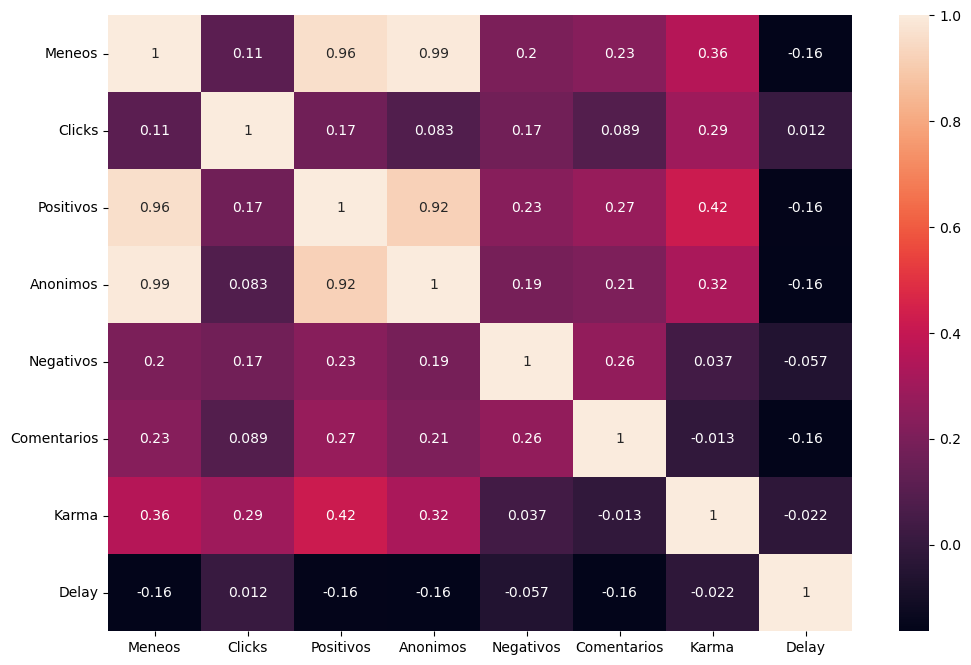

In [18]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_tt._get_numeric_data().corr(), annot = True)
plt.show()

## PREPROCESAMIENTO ##

In [26]:
df_tt.head(3)

,Titular,URL,Meneos,Clicks,Positivos,Anonimos,Negativos,Comentarios,Karma,Delay
0,Que arresten a los líderes de Israel por críme...,https://old.meneame.net/story/arresten-lideres...,81,111.0,51.0,30.0,4.0,11.0,463.0,7655.0
1,El pelotazo de los curas salesianos con una pi...,https://old.meneame.net/story/pelotazo-curas-s...,73,336.0,43.0,30.0,3.0,20.0,441.0,10093.0
2,Países Bajos no participa en el segundo ensayo...,https://old.meneame.net/story/paises-bajos-no-...,123,1275.0,72.0,51.0,3.0,39.0,460.0,1683.0


In [27]:
modelos = [LinearRegression(),
            KNeighborsRegressor(),
            # RadiusNeighborsRegressor(),
            DecisionTreeRegressor(),
            RandomForestRegressor(),
            SVR(),
            AdaBoostRegressor(),
            GradientBoostingRegressor()]

In [29]:
# train, test split

X = df_tt.iloc[:, 2:].drop(["Clicks"], axis = 1)
y = df_tt["Clicks"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

# y_scaler = MinMaxScaler()
# y_train = y_scaler.fit_transform(y_train)
# y_test = y_scaler.transform(y_test)

datos_modelos = list()

for model in modelos:

    model.fit(X_train, y_train)
    yhat = model.predict(X_test)

    # y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1))
    # yhat_inv = y_scaler.inverse_transform(yhat.reshape(-1, 1))

    #Metricas
    mae = mean_absolute_error(y_test, yhat)
    mse = mean_squared_error(y_test, yhat)
    r2 = r2_score(y_test, yhat)

    datos_modelos.append([str(model).strip("()"), model, mae, mse, r2])

df_modelo = pd.DataFrame(data = datos_modelos, columns = ["name", "model", "mae", "mse", "r2"])

df_modelo.sort_values("r2", ascending = False)



MemoryError: 

In [30]:
df_modelo = pd.DataFrame(data = datos_modelos, columns = ["name", "model", "mae", "mse", "r2"])

df_modelo.sort_values("r2", ascending = False)

,name,model,mae,mse,r2
0,LinearRegression,LinearRegression(),3188.0552919,2.3326829e+07,0.1324793
1,KNeighborsRegressor,KNeighborsRegressor(),3107.7781386,2.4180081e+07,0.1007470


In [ ]:
for i in datos_modelos:
    datos_modelos[i][1]

DecisionTreeRegressor()

In [ ]:
import pickle
import os

try:
    os.mkdir("modelos_clicks")
except: pass

# Guardamos el mejor modelo y los escaladores

for i in range(len(datos_modelos)):
    modelo = datos_modelos[i][1]

    with open(file = f"modelos_clicks/{str(modelo)}.pkl", mode = "bw") as file:
        pickle.dump(modelo, file)
    
    print(f"modelos_clicks/{str(modelo)}.pkl")

modelos_clicks/DecisionTreeRegressor().pkl
modelos_clicks/RandomForestRegressor().pkl
modelos_clicks/SVR().pkl
modelos_clicks/AdaBoostRegressor().pkl
modelos_clicks/GradientBoostingRegressor().pkl


int

In [ ]:
str(model)

'GradientBoostingRegressor()'